# 梯度下降和随机梯度下降

本节中，我们将介绍梯度下降（gradient descent）和随机梯度下降（stochastic gradient descent）算法。由于梯度下降是优化算法的核心部分，理解梯度的涵义十分重要。为了帮助大家深刻理解梯度，我们将从数学角度阐释梯度下降的意义。本节中，我们假设目标函数连续可导。



## 一维梯度下降

我们先以简单的一维梯度下降为例，解释梯度下降算法可以降低目标函数值的原因。一维梯度是一个标量，也称导数。

假设函数 $f: \mathbb{R} \rightarrow \mathbb{R}$ 的输入和输出都是标量。给定足够小的数 $\epsilon$，根据泰勒展开公式（参见 [“数学基础”](../chapter_appendix/math.md) 一节），我们得到以下的近似

$$f(x + \epsilon) \approx f(x) + f'(x) \epsilon.$$

假设 $\eta$ 是一个常数，将 $\epsilon$ 替换为 $-\eta f'(x)$ 后，我们有

$$f(x - \eta f'(x)) \approx f(x) -  \eta f'(x)^2.$$

如果 $\eta$ 是一个很小的正数，那么

$$f(x - \eta f'(x)) \lesssim f(x).$$

也就是说，如果目标函数 $f(x)$ 当前的导数 $f'(x) \neq 0$，按照

$$x \leftarrow x - \eta f'(x).$$

迭代自变量 $x$ 可能会降低 $f(x)$ 的值。由于导数 $f'(x)$ 是梯度 $\nabla_x f$ 在一维空间的特殊情况，上述迭代自变量 $x$ 的方法也即一维空间的梯度下降。一维空间的梯度下降图 7.1（左）所示，自变量 $x$ 沿着梯度方向迭代。

![ 梯度下降中，目标函数 $f(x)$ 的自变量 $x$（圆圈的横坐标）沿着梯度方向迭代。](../img/gd_and_overshooting.svg)


## 学习率

上述梯度下降算法中的 $\eta$ 叫做学习率。这是一个超参数，需要人工设定。学习率 $\eta$ 要取正数。

需要注意的是，学习率过大可能会造成自变量 $x$ 越过（overshoot）目标函数 $f(x)$ 的最优解，甚至发散。见图 7.1（右）。

然而，如果学习率过小，目标函数中自变量的收敛速度会过慢。实际中，一个合适的学习率通常是需要通过多次实验找到的。


## 多维梯度下降

现在我们考虑一个更广义的情况：目标函数的输入为向量，输出为标量。

假设目标函数 $f: \mathbb{R}^d \rightarrow \mathbb{R}$ 的输入是一个 $d$ 维向量 $\boldsymbol{x} = [x_1, x_2, \ldots, x_d]^\top$。目标函数 $f(\boldsymbol{x})$ 有关 $\boldsymbol{x}$ 的梯度是一个由 $d$ 个偏导数组成的向量：

$$\nabla_{\boldsymbol{x}} f(\boldsymbol{x}) = \bigg[\frac{\partial f(\boldsymbol{x})}{\partial x_1}, \frac{\partial f(\boldsymbol{x})}{\partial x_2}, \ldots, \frac{\partial f(\boldsymbol{x})}{\partial x_d}\bigg]^\top.$$


为表示简洁，我们用 $\nabla f(\boldsymbol{x})$ 代替 $\nabla_{\boldsymbol{x}} f(\boldsymbol{x})$。梯度中每个偏导数元素 $\partial f(\boldsymbol{x})/\partial x_i$ 代表着 $f$ 在 $\boldsymbol{x}$ 有关输入 $x_i$ 的变化率。为了测量 $f$ 沿着单位向量 $\boldsymbol{u}$ 方向上的变化率，在多元微积分中，我们定义 $f$ 在 $\boldsymbol{x}$ 上沿着 $\boldsymbol{u}$ 方向的方向导数为

$$D_{\boldsymbol{u}} f(\boldsymbol{x}) = \lim_{h \rightarrow 0}  \frac{f(\boldsymbol{x} + h \boldsymbol{u}) - f(\boldsymbol{x})}{h}.$$

依据方向导数性质 \[1，14.6 节定理三 \]，该方向导数可以改写为

$$D_{\boldsymbol{u}} f(\boldsymbol{x}) = \nabla f(\boldsymbol{x}) \cdot \boldsymbol{u}.$$

方向导数 $D_{\boldsymbol{u}} f(\boldsymbol{x})$ 给出了 $f$ 在 $\boldsymbol{x}$ 上沿着所有可能方向的变化率。为了最小化 $f$，我们希望找到 $f$ 能被降低最快的方向。因此，我们可以通过单位向量 $\boldsymbol{u}$ 来最小化方向导数 $D_{\boldsymbol{u}} f(\boldsymbol{x})$。

由于 $D_{\boldsymbol{u}} f(\boldsymbol{x}) = \|\nabla f(\boldsymbol{x})\| \cdot \|\boldsymbol{u}\|  \cdot \text{cos} (\theta) = \|\nabla f(\boldsymbol{x})\|  \cdot \text{cos} (\theta)$，
其中 $\theta$ 为梯度 $\nabla f(\boldsymbol{x})$ 和单位向量 $\boldsymbol{u}$ 之间的夹角，当 $\theta = \pi$，$\text{cos}(\theta)$ 取得最小值 -1。因此，当 $\boldsymbol{u}$ 在梯度方向 $\nabla f(\boldsymbol{x})$ 的相反方向时，方向导数 $D_{\boldsymbol{u}} f(\boldsymbol{x})$ 被最小化。所以，我们可能通过下面的梯度下降算法来不断降低目标函数 $f$ 的值：

$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f(\boldsymbol{x}).$$

相同地，其中 $\eta$（取正数）称作学习率。

## 随机梯度下降

然而，当训练数据集很大时，梯度下降算法可能会难以使用。为了解释这个问题，考虑目标函数

$$f(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n f_i(\boldsymbol{x}),$$

其中 $f_i(\boldsymbol{x})$ 是有关索引为 $i$ 的训练数据样本的损失函数，$n$ 是训练数据样本数。由于

$$\nabla f(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\boldsymbol{x}),$$

梯度下降每次迭代的计算开销随着 $n$ 线性增长。因此，当训练数据样本数很大时，梯度下降每次迭代的计算开销很高。这时我们可以使用随机梯度下降。给定学习率 $\eta$（取正数），在每次迭代时，随机梯度下降算法随机均匀采样 $i$ 并计算 $\nabla f_i(\boldsymbol{x})$ 来迭代 $\boldsymbol{x}$：

$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f_i(\boldsymbol{x}).$$


事实上，随机梯度 $\nabla f_i(\boldsymbol{x})$ 是对梯度 $\nabla f(\boldsymbol{x})$ 的无偏估计：

$$\mathbb{E}_i \nabla f_i(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\boldsymbol{x}) = \nabla f(\boldsymbol{x}).$$


## 小批量随机梯度下降

广义上，每一次迭代可以随机均匀采样一个由训练数据样本索引所组成的小批量（mini-batch）$\mathcal{B}$。一般来说，
我们可以通过重复采样（sampling with replacement）或者不重复采样（sampling without replacement）得到同一个小批量中的各个样本。前者允许同一个小批量中出现重复的样本，后者则不允许如此。对于这两者间的任一种方式，我们可以使用

$$\nabla f_\mathcal{B}(\boldsymbol{x}) = \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}\nabla f_i(\boldsymbol{x})$$ 

来迭代 $\boldsymbol{x}$：

$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f_\mathcal{B}(\boldsymbol{x}).$$

在上式中，$|\mathcal{B}|$ 代表样本批量大小，$\eta$（取正数）称作学习率。同样，小批量随机梯度 $\nabla f_\mathcal{B}(\boldsymbol{x})$ 也是对梯度 $\nabla f(\boldsymbol{x})$ 的无偏估计 :

$$\mathbb{E}_\mathcal{B} \nabla f_\mathcal{B}(\boldsymbol{x}) = \nabla f(\boldsymbol{x}).$$

这个算法叫做小批量随机梯度下降。该算法每次迭代的计算开销为 $\mathcal{O}(|\mathcal{B}|)$。当批量大小为 1 时，该算法即随机梯度下降；当批量大小等于训练数据样本数，该算法即梯度下降。和学习率一样，批量大小也是一个超参数。当批量较小时，虽然每次迭代的计算开销较小，但计算机并行处理批量中各个样本的能力往往只得到较少利用。因此，当训练数据集的样本较少时，我们可以使用梯度下降；当样本较多时，我们可以使用小批量梯度下降并依据计算资源选择合适的批量大小。

实际中，我们通常在每个迭代周期（epoch）开始前随机打乱数据集中样本的先后顺序，然后在同一个迭代周期中依次读取小批量的样本。理论上，这种方法能让符合某些特征的目标函数的优化收敛更快 [2]。我们在实验中也用这种方法随机采样小批量样本。



## 小批量随机梯度下降的实现

我们只需要实现小批量随机梯度下降。当批量大小等于训练集大小时，该算法即为梯度下降；批量大小为 1 即为随机梯度下降。

In [1]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

## 实验

首先，导入本节中实验所需的包或模块。

In [2]:
import sys
sys.path.append('..')
import gluonbook as gb
from mxnet import autograd, nd
import numpy as np
import random

实验中，我们以之前介绍过的线性回归为例。我们直接调用 `gluonbook` 中的线性回归模型和平方损失函数。它们已在 [“线性回归的从零开始实现”](../chapter_deep-learning-basics/linear-regression-scratch.md) 一节中实现过了。

In [3]:
net = gb.linreg
loss = gb.squared_loss

设数据集的样本数为 1000，我们使用权重 `w` 为 [2, -3.4]，偏差 `b` 为 4.2 的线性回归模型来生成数据集。该模型的平方损失函数即所需优化的目标函数，模型参数即目标函数自变量。

In [4]:
# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

# 初始化模型参数。
def init_params():
    w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    params = [w, b]
    for param in params:
        param.attach_grad()
    return params

下面我们描述一下优化函数 `optimize`。

由于随机梯度的方差在迭代过程中无法减小，（小批量）随机梯度下降的学习率通常会采用自我衰减的方式。如此一来，学习率和随机梯度乘积的方差会衰减。实验中，当迭代周期（`epoch`）大于 2 时，（小批量）随机梯度下降的学习率在每个迭代周期开始时自乘 0.1 作自我衰减。而梯度下降在迭代过程中一直使用目标函数的真实梯度，无需自我衰减学习率。

在迭代过程中，每当 `log_interval` 个样本被采样过后，模型当前的损失函数值（`loss`）被记录下并用于作图。例如，当 `batch_size` 和 `log_interval` 都为 10 时，每次迭代后的损失函数值都被用来作图。

In [5]:
def optimize(batch_size, lr, num_epochs, log_interval, decay_epoch):
    w, b = init_params()
    ls = [loss(net(features, w, b), labels).mean().asnumpy()]
    for epoch in range(1, num_epochs + 1):
        # 学习率自我衰减。
        if decay_epoch and epoch > decay_epoch:
            lr *= 0.1
        for batch_i, (X, y) in enumerate(
            gb.data_iter(batch_size, features, labels)):
            with autograd.record():
                l = loss(net(X, w, b), y)
            # 先对 l 中元素求和，得到小批量损失之和，然后求参数的梯度。
            l.backward()
            sgd([w, b], lr, batch_size)
            if batch_i * batch_size % log_interval == 0:
                ls.append(loss(net(features, w, b), labels).mean().asnumpy())
    print('w:', w, '\nb:', b, '\n')
    es = np.linspace(0, num_epochs, len(ls), endpoint=True)
    gb.semilogy(es, ls, 'epoch', 'loss')

当批量大小为 1 时，优化使用的是随机梯度下降。在当前学习率下，损失函数值在早期快速下降后略有波动。这是由于随机梯度的方差在迭代过程中无法减小。当迭代周期大于 2，学习率自我衰减后，损失函数值下降后较平稳。最终，优化所得的模型参数值 `w` 和 `b` 与它们的真实值 [2, -3.4] 和 4.2 较接近。

w: 
[[ 2.00171328]
 [-3.40007234]]
<NDArray 2x1 @cpu(0)> 
b: 
[ 4.19994164]
<NDArray 1 @cpu(0)> 



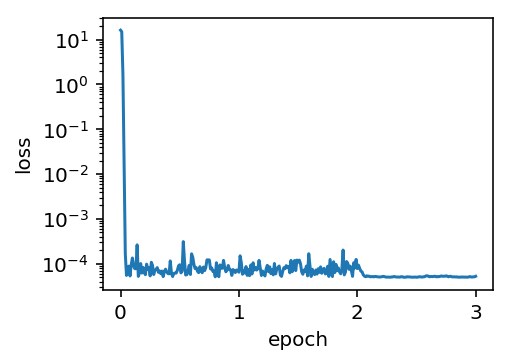

In [6]:
optimize(batch_size=1, lr=0.2, num_epochs=3, decay_epoch=2, log_interval=10)

当批量大小为 1000 时，由于数据样本总数也是 1000，优化使用的是梯度下降。梯度下降无需自我衰减学习率（`decay_epoch=None`）。最终，优化所得的模型参数值与它们的真实值较接近。

需要注意的是，梯度下降的 1 个迭代周期对模型参数只迭代 1 次。而随机梯度下降的批量大小为 1，它在 1 个迭代周期对模型参数迭代了 1000 次。我们观察到，1 个迭代周期后，梯度下降所得的损失函数值比随机梯度下降所得的损失函数值略大。而在 3 个迭代周期后，这两个算法所得的损失函数值很接近。

w: 
[[ 2.00053716]
 [-3.40285206]]
<NDArray 2x1 @cpu(0)> 
b: 
[ 4.19865417]
<NDArray 1 @cpu(0)> 



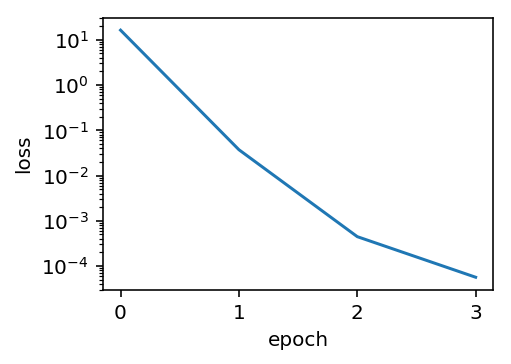

In [7]:
optimize(batch_size=1000, lr=0.999, num_epochs=3, decay_epoch=None, 
         log_interval=1000)

当批量大小为 10 时，由于数据样本总数也是 1000，优化使用的是小批量随机梯度下降。最终，优化所得的模型参数值与它们的真实值较接近。

w: 
[[ 1.99976611]
 [-3.39989758]]
<NDArray 2x1 @cpu(0)> 
b: 
[ 4.20017767]
<NDArray 1 @cpu(0)> 



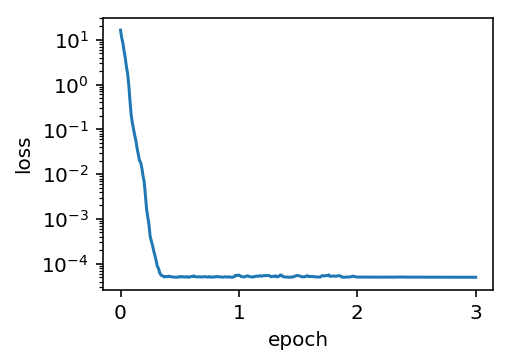

In [8]:
optimize(batch_size=10, lr=0.2, num_epochs=3, decay_epoch=2, log_interval=10)

同样是批量大小为 10，我们把学习率改大。这时损失函数值不断增大，直到出现“nan”（not a number，非数）。
这是因为，过大的学习率造成了模型参数越过最优解并发散。最终学到的模型参数也是“nan”。

w: 
[[ nan]
 [ nan]]
<NDArray 2x1 @cpu(0)> 
b: 
[ nan]
<NDArray 1 @cpu(0)> 



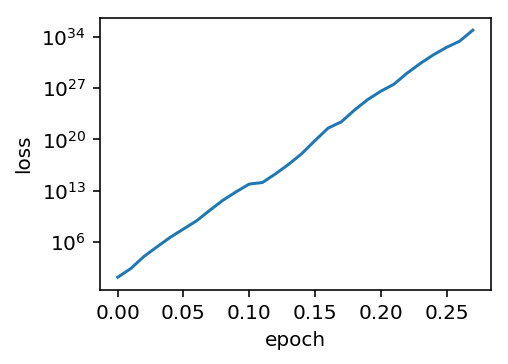

In [9]:
optimize(batch_size=10, lr=5, num_epochs=3, decay_epoch=2, log_interval=10)

同样是批量大小为 10，我们把学习率改小。这时我们观察到损失函数值下降较慢，直到 3 个迭代周期模型参数也没能接近它们的真实值。

w: 
[[ 0.69051242]
 [-1.19998205]]
<NDArray 2x1 @cpu(0)> 
b: 
[ 1.37708068]
<NDArray 1 @cpu(0)> 



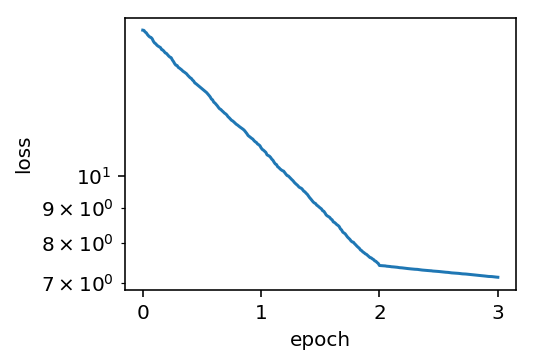

In [10]:
optimize(batch_size=10, lr=0.002, num_epochs=3, decay_epoch=2,
         log_interval=10)

## 小结

* 当训练数据较大，梯度下降每次迭代计算开销较大，因而（小批量）随机梯度下降更受青睐。
* 学习率过大过小都有问题。一个合适的学习率通常是需要通过多次实验找到的。


## 练习

* 运行本节中实验代码。比较一下随机梯度下降和梯度下降的运行时间。
* 梯度下降和随机梯度下降虽然看上去有效，但可能会有哪些问题？

## 扫码直达 [ 讨论区 ](https://discuss.gluon.ai/t/topic/1877)


![](../img/qr_gd-sgd.svg)


## 参考文献

[1] Stewart, J. (2010). Calculus: Early Transcendentals (7th Edition). Brooks Cole.

[2] G ü rb ü zbalaban, M., Ozdaglar, A., & Parrilo, P. (2018). Why random reshuffling beats stochastic gradient descent. arXiv preprint arXiv:1510.08560.